# Lab 2  
**By Manee Das Shrestha (KCE080BCT013)**

---



## 1. Bijection Method

The bijection method is a mathematical technique used to establish a one-to-one correspondence between two sets. In combinatorics, it is often used to count the number of elements in a set by relating it to another set whose size is already known. A function is called a bijection if it is both injective (one-to-one) and surjective (onto), ensuring that every element in one set maps to a unique element in the other set and vice versa. This method is powerful for proving combinatorial identities and solving counting problems.

Approximate root: 2.00000


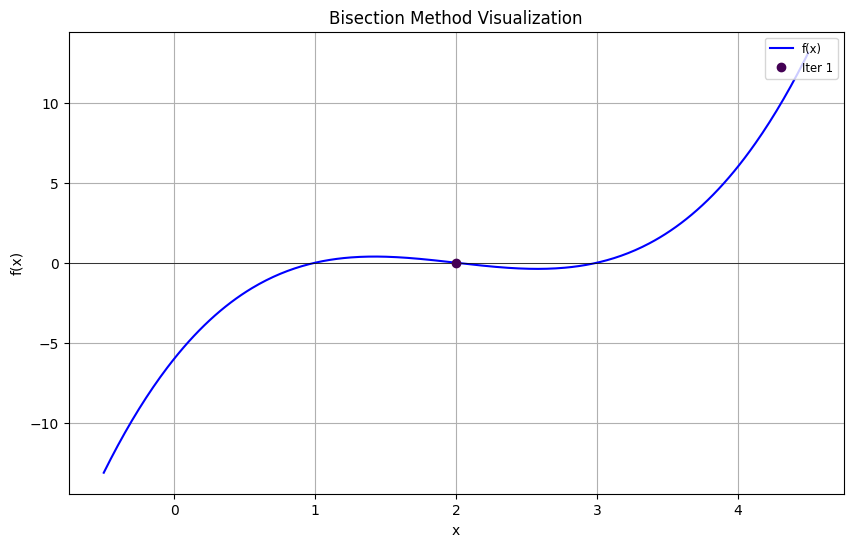

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Define the function
def f(x):
    return x**3 - 6*x**2 + 11*x - 6  # roots at x=1, 2, 3

# Bisection method implementation
def bisection(f, a, b, tol=1e-5, max_iter=50):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs")

    midpoints = []
    for i in range(max_iter):
        c = (a + b) / 2
        midpoints.append(c)

        if abs(f(c)) < tol or (b - a) / 2 < tol:
            break

        if f(c) * f(a) < 0:
            b = c
        else:
            a = c

    return c, midpoints

# Plotting
def plot_bisection(f, a, b, midpoints):
    x = np.linspace(a - 1, b + 1, 400)
    y = f(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='f(x)', color='blue')
    plt.axhline(0, color='black', linewidth=0.5)

    # Plot midpoints using a colormap
    colors = cm.viridis(np.linspace(0, 1, len(midpoints)))
    for i, (xm, color) in enumerate(zip(midpoints, colors)):
        plt.plot(xm, f(xm), 'o', color=color, label=f'Iter {i+1}' if i < 10 else "")

    plt.title('Bisection Method Visualization')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(loc='upper right', fontsize='small')
    plt.grid(True)
    plt.show()

# Run
a = 0.5
b = 3.5
root, midpoints = bisection(f, a, b)
print(f"Approximate root: {root:.5f}")
plot_bisection(f, a, b, midpoints)


## 2. Secant Method

The secant method is a numerical technique used to find the roots of a real-valued function. Unlike the bisection method, which requires the function to have opposite signs at the endpoints of an interval, the secant method uses two initial approximations and constructs a sequence of secant lines to approximate the root. At each iteration, the method replaces one of the points with a new point where the secant line crosses the x-axis. The process continues until the root is found within a desired tolerance.

The secant method is generally faster than the bisection method and does not require the function to be continuous or to change sign. However, it may not always converge if the initial guesses are not close to the actual root. 

Approximate root: 3.000000


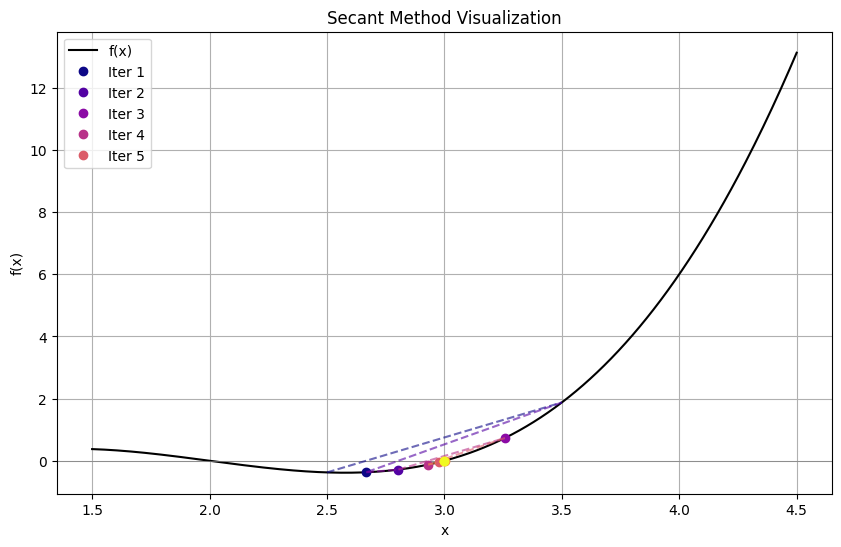

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Define the function
def f(x):
    return x**3 - 6*x**2 + 11*x - 6  # Roots at x = 1, 2, 3

# Secant Method
def secant_method(f, x0, x1, tol=1e-6, max_iter=20):
    points = [(x0, f(x0)), (x1, f(x1))]
    
    for _ in range(max_iter):
        fx0, fx1 = f(x0), f(x1)
        if fx1 - fx0 == 0:
            print("Division by zero in Secant method.")
            break

        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        points.append((x2, f(x2)))

        if abs(f(x2)) < tol:
            break

        x0, x1 = x1, x2
    
    return points

# Visualization
def plot_secant(f, points):
    x_vals = np.linspace(min(p[0] for p in points)-1, max(p[0] for p in points)+1, 400)
    y_vals = f(x_vals)

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='f(x)', color='black')
    plt.axhline(0, color='gray', linewidth=0.5)

    colors = cm.plasma(np.linspace(0, 1, len(points)-2))
    for i in range(2, len(points)):
        x0, y0 = points[i-2]
        x1, y1 = points[i-1]
        x2, y2 = points[i]
        
        # Line between previous two points
        plt.plot([x0, x1], [y0, y1], linestyle='--', color=colors[i-2], alpha=0.6)
        # Mark new guess
        plt.plot(x2, y2, 'o', color=colors[i-2], label=f'Iter {i-1}' if i <= 6 else "")

    plt.title("Secant Method Visualization")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run
x0 = 2.5
x1 = 3.5
points = secant_method(f, x0, x1)
print(f"Approximate root: {points[-1][0]:.6f}")
plot_secant(f, points)


## 3. Newton-Raphson Method

The Newton-Raphson method is an efficient iterative technique for finding the roots of a real-valued function. Starting from an initial guess, the method uses the function and its derivative to generate successively better approximations to the root. 

This method converges rapidly when the initial guess is close to the actual root and the function behaves well. However, it requires the computation of the derivative and may fail to converge if the derivative is zero or the initial guess is not suitable. The Newton-Raphson method is widely used due to its speed and simplicity in solving nonlinear equations.

Approximate root: 3.000000


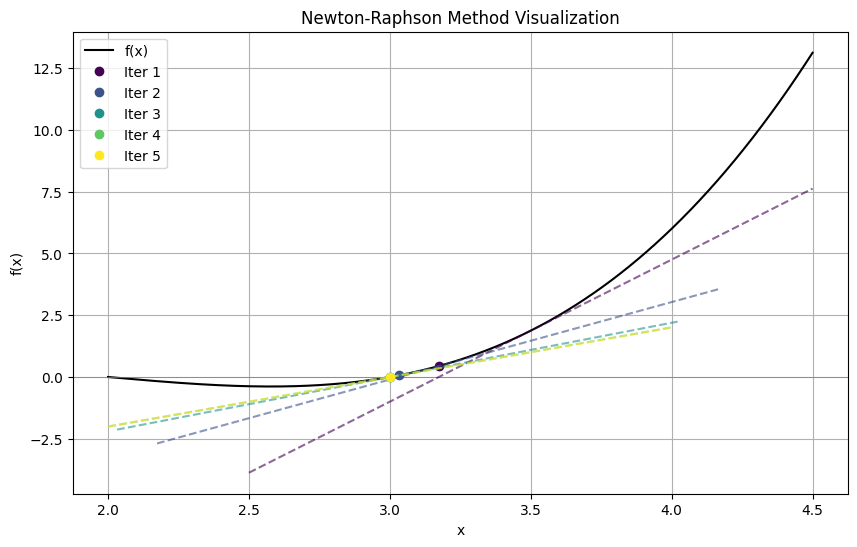

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Define the function and its derivative
def f(x):
    return x**3 - 6*x**2 + 11*x - 6  # Roots: x = 1, 2, 3

def df(x):
    return 3*x**2 - 12*x + 11  # Derivative

# Newton-Raphson method
def newton_raphson(f, df, x0, tol=1e-6, max_iter=20):
    points = [(x0, f(x0))]

    for i in range(max_iter):
        f_x = f(x0)
        df_x = df(x0)

        if df_x == 0:
            print("Zero derivative. No solution found.")
            break

        x1 = x0 - f_x / df_x
        points.append((x1, f(x1)))

        if abs(f(x1)) < tol:
            break

        x0 = x1

    return points

# Visualization
def plot_newton(f, points):
    x_vals = np.linspace(min(p[0] for p in points) - 1, max(p[0] for p in points) + 1, 400)
    y_vals = f(x_vals)

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label="f(x)", color='black')
    plt.axhline(0, color='gray', linewidth=0.5)

    colors = cm.viridis(np.linspace(0, 1, len(points) - 1))
    for i in range(1, len(points)):
        x_prev, y_prev = points[i - 1]
        x_curr, y_curr = points[i]

        # Draw tangent line
        slope = (y_curr - y_prev) / (x_curr - x_prev) if (x_curr - x_prev) != 0 else 0
        tangent_x = np.linspace(x_prev - 1, x_prev + 1, 10)
        tangent_y = f(x_prev) + df(x_prev) * (tangent_x - x_prev)

        plt.plot(tangent_x, tangent_y, linestyle='--', color=colors[i - 1], alpha=0.6)
        plt.plot(x_curr, y_curr, 'o', color=colors[i - 1], label=f"Iter {i}" if i <= 5 else "")

    plt.title("Newton-Raphson Method Visualization")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run
x0 = 3.5
points = newton_raphson(f, df, x0)
print(f"Approximate root: {points[-1][0]:.6f}")
plot_newton(f, points)


## 4. Newton-Raphson Method for system of nonlinear equations

The Newton-Raphson method can be extended to solve systems of nonlinear equations. 

Approximate solution: x = 1.931852, y = 0.517638


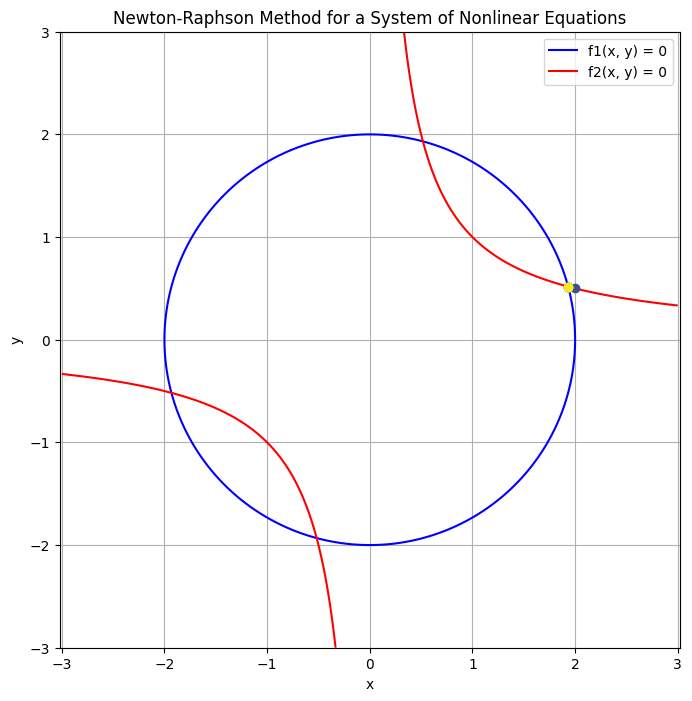

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.lines as mlines

# System of equations: F(x, y)
def F(X):
    x, y = X
    return np.array([
        x**2 + y**2 - 4,    # Circle: radius 2
        x * y - 1           # Hyperbola
    ])

# Jacobian matrix of the system
def J(X):
    x, y = X
    return np.array([
        [2*x, 2*y],
        [y, x]
    ])

# Newton-Raphson for systems
def newton_raphson_system(F, J, x0, tol=1e-6, max_iter=20):
    X = np.array(x0, dtype=float)
    path = [X.copy()]

    for i in range(max_iter):
        Fx = F(X)
        Jx = J(X)

        try:
            delta = np.linalg.solve(Jx, -Fx)
        except np.linalg.LinAlgError:
            print("Jacobian is singular. Cannot proceed.")
            break

        X += delta
        path.append(X.copy())

        if np.linalg.norm(Fx, ord=2) < tol:
            break

    return np.array(path)

# Plot the system and iteration path
def plot_system(F, path):
    x_vals = np.linspace(-3, 3, 400)
    y_vals = np.linspace(-3, 3, 400)
    X, Y = np.meshgrid(x_vals, y_vals)

    F1 = X**2 + Y**2 - 4      # f1
    F2 = X * Y - 1            # f2

    plt.figure(figsize=(8, 8))
    c1 = plt.contour(X, Y, F1, levels=[0], colors='blue', linewidths=1.5)
    c2 = plt.contour(X, Y, F2, levels=[0], colors='red', linewidths=1.5)

    # Plot iteration path
    colors = cm.viridis(np.linspace(0, 1, len(path)))
    for i in range(1, len(path)):
        plt.plot([path[i-1][0], path[i][0]], [path[i-1][1], path[i][1]],
                 color=colors[i], marker='o')

    # Labels and legend
    blue_line = mlines.Line2D([], [], color='blue', label='f1(x, y) = 0')
    red_line = mlines.Line2D([], [], color='red', label='f2(x, y) = 0')
    plt.legend(handles=[blue_line, red_line])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.title("Newton-Raphson Method for a System of Nonlinear Equations")
    plt.axis('equal')
    plt.show()

# Run the solver
x0 = [2.0, 0.5]  # Improved initial guess
path = newton_raphson_system(F, J, x0)

print(f"Approximate solution: x = {path[-1][0]:.6f}, y = {path[-1][1]:.6f}")
plot_system(F, path)
